In [17]:
# Analysis 
import numpy as np
import xarray as xr

import copy

# Plotting
import matplotlib.pyplot as plt

In [2]:
test = xr.open_dataset('/g/data/rr5/CPOL_radar/CPOL_level_1b/GRIDDED/GRID_150km_2500m/2003/20030112/CPOL_20030112_1300_GRIDS_2500m.nc')

In [3]:
test.radar_estimated_rain_rate.values[test.radar_estimated_rain_rate.values>10**10] = np.nan

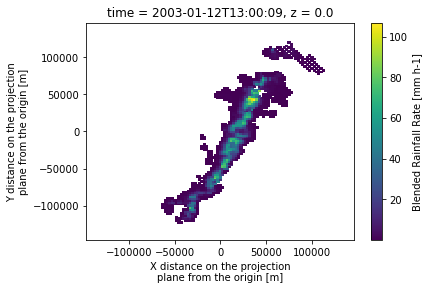

In [4]:
test.radar_estimated_rain_rate[0,0].plot()

In [24]:
test3 = test2.values
test4 = xr.DataArray()

test22 = copy.deepcopy(test2)

testest = [copy.deepcopy(test2) for i in range(10000)]

# test2.to_netcdf('/g/data/w40/esh563/CPOL_analysis/test.nc')

In [10]:
test.radar_estimated_rain_rate

<xarray.DataArray 'radar_estimated_rain_rate' (time: 1, z: 41, y: 117, x: 117)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-12T13:00:09
  * x        (x) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * y        (y) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:      Blended Rainfall Rate
    units:          mm h-1
    standard_name:  Rainfall Rate
    description:    Rainfall rate algorithm based on Thompson et al. 2016.

In [11]:
test.reflectivity.sel(x=0).sel(y=0).isel(time=0)

<xarray.DataArray 'reflectivity' (z: 41)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2003-01-12T13:00:09
    x        float64 0.0
    y        float64 0.0
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:      Corrected reflectivity
    units:          dBZ
    standard_name:  corrected_equivalent_reflectivity_factor
    coordinates:    elevation azimuth range

In [115]:
test = xr.open_mfdataset('/g/data/rr5/CPOL_radar/CPOL_level_1b/GRIDDED/GRID_150km_2500m/2003/20030112/CPOL_20030112_*_GRIDS_2500m.nc')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [116]:
ref=test.reflectivity.mean(dim=['x', 'y'], skipna=True)

In [117]:
ref=ref.load()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [119]:
cth = np.zeros(144)
for i in range(len(cth)):
    cth[i] = get_pos_ind(ref.isel(time=i))
cth *= 500

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [105]:
def get_pos_ind(da):
    inds = np.argwhere(da.values>0)
    if inds.size > 0:
        top_ind = inds[-1,0]
    else:
        top_ind = 0
    return top_ind

In [120]:
mins = np.arange(0,24*60,10)

In [121]:
mins.size

144

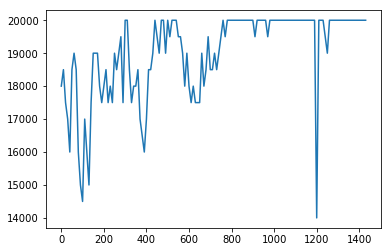

In [122]:
plt.plot(mins,cth)